- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [860]:
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [861]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [862]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [863]:
data.shape

(8950, 18)

<Axes: >

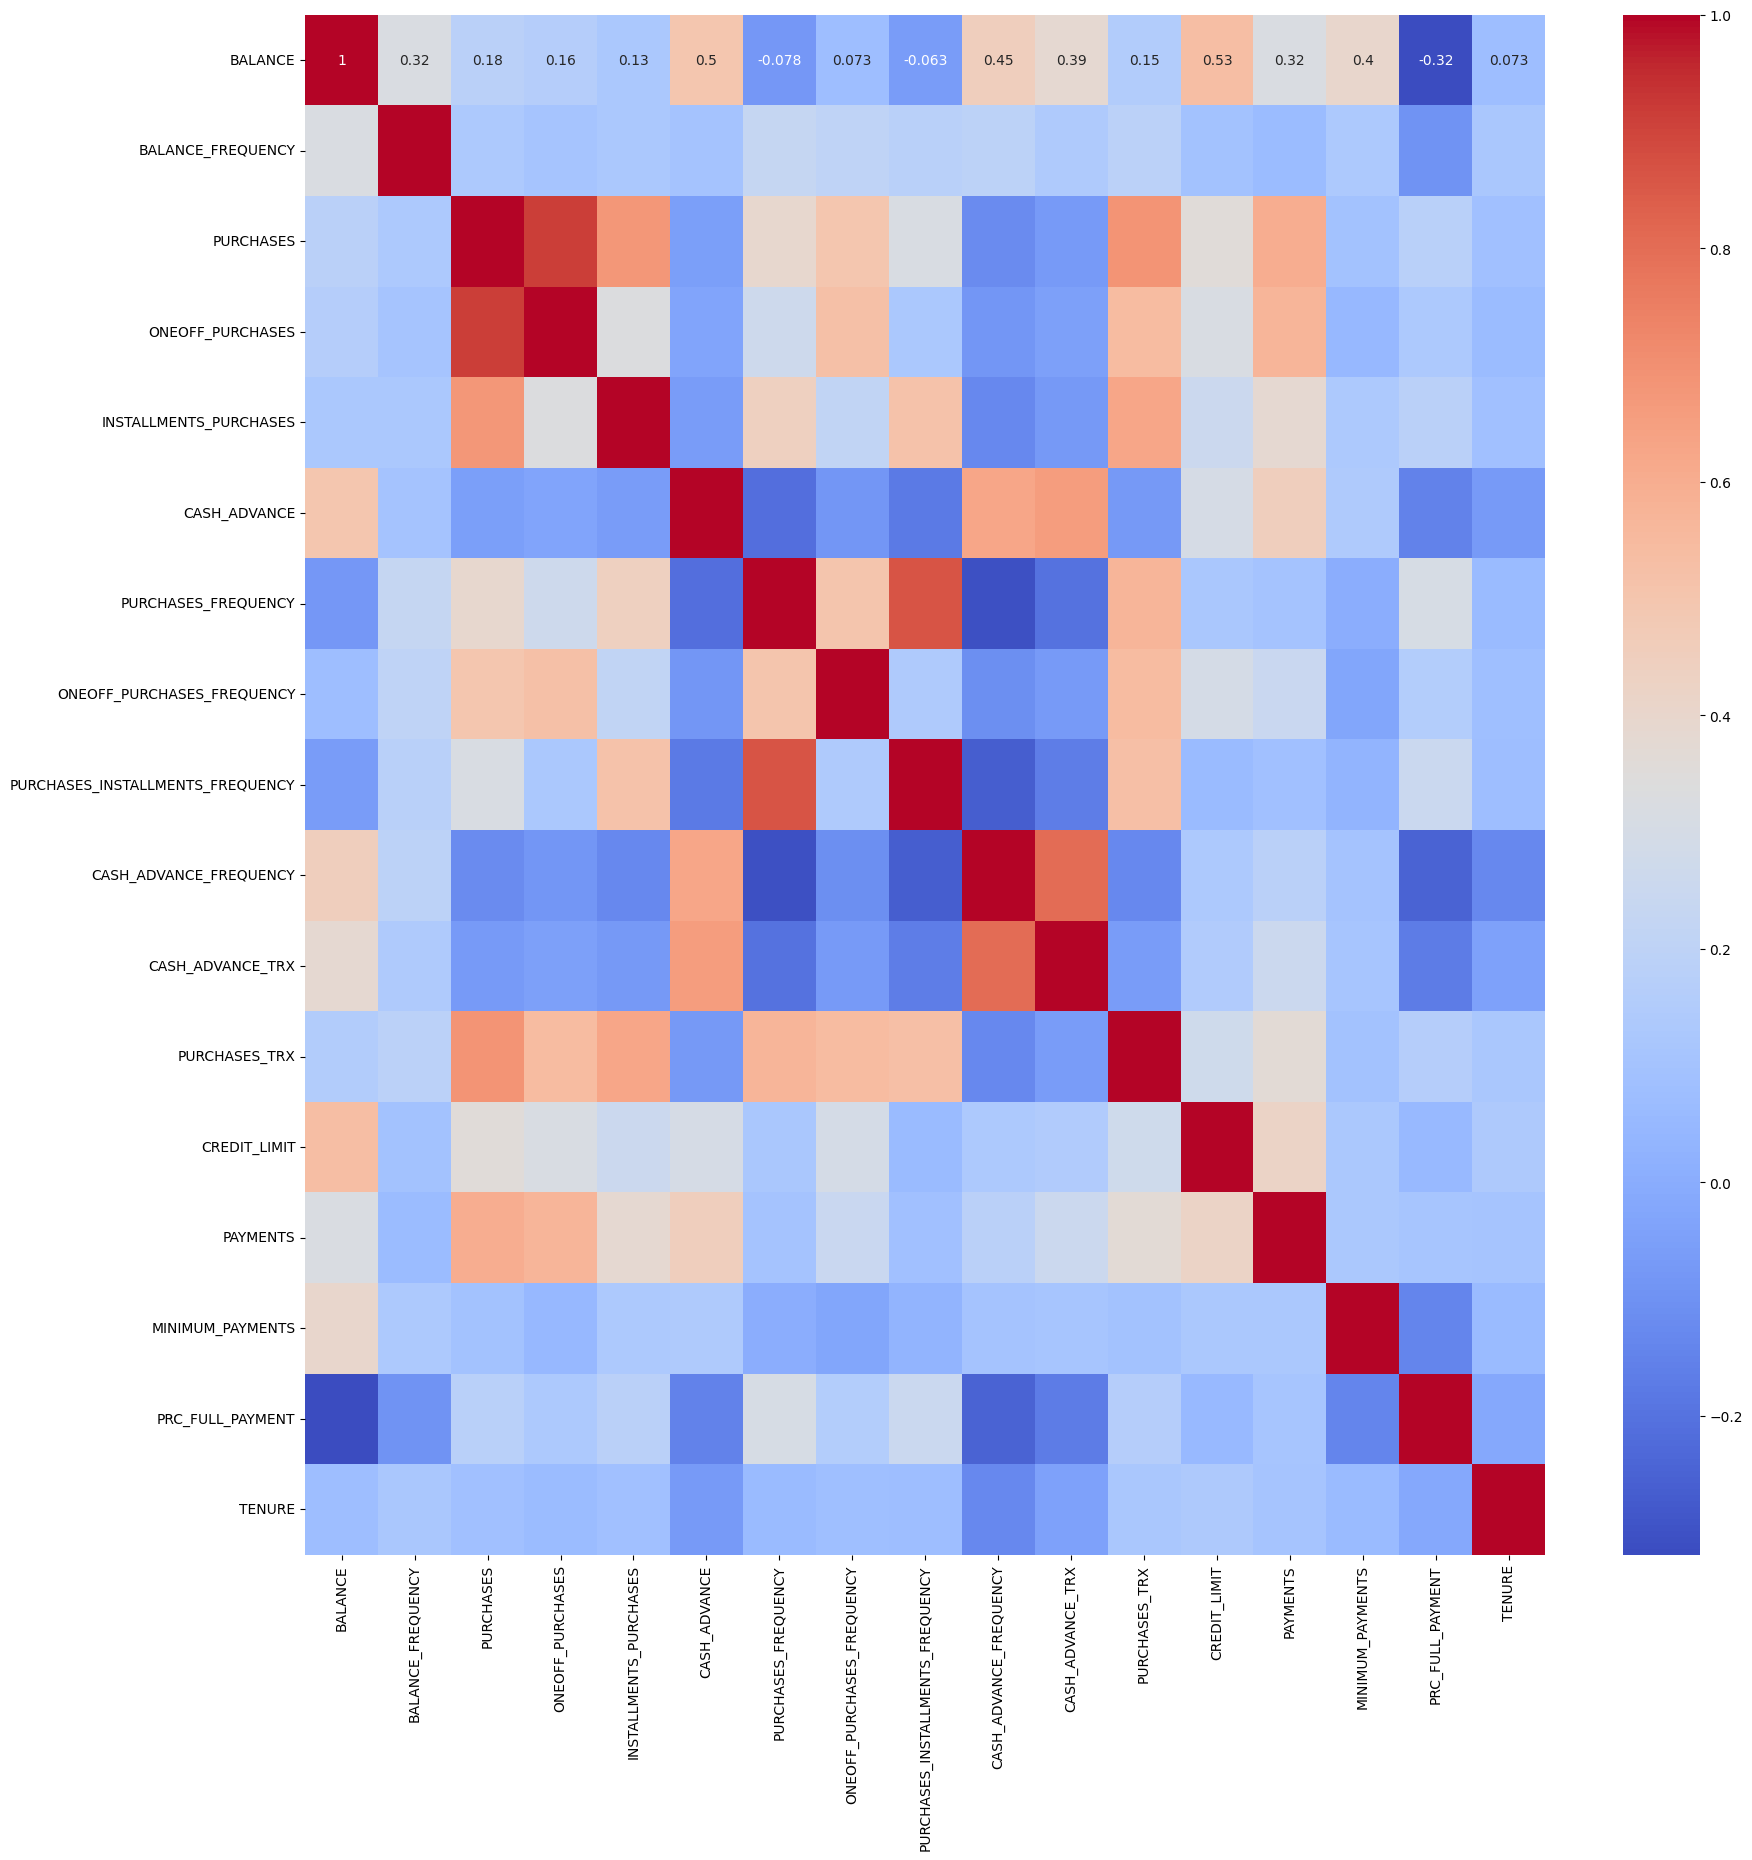

In [864]:
numerical=[features for features in data.columns if data[features].dtype!="O"]
plt.figure(figsize=(20,20))
sns.heatmap(data[numerical].corr(),annot=True,cmap="coolwarm")

In [865]:
data.iloc[:,1:].skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [866]:
categorical=[features for features in data.columns if data[features].dtype=="O"]
categorical

['CUST_ID']

In [867]:
import warnings 
warnings.filterwarnings("ignore")

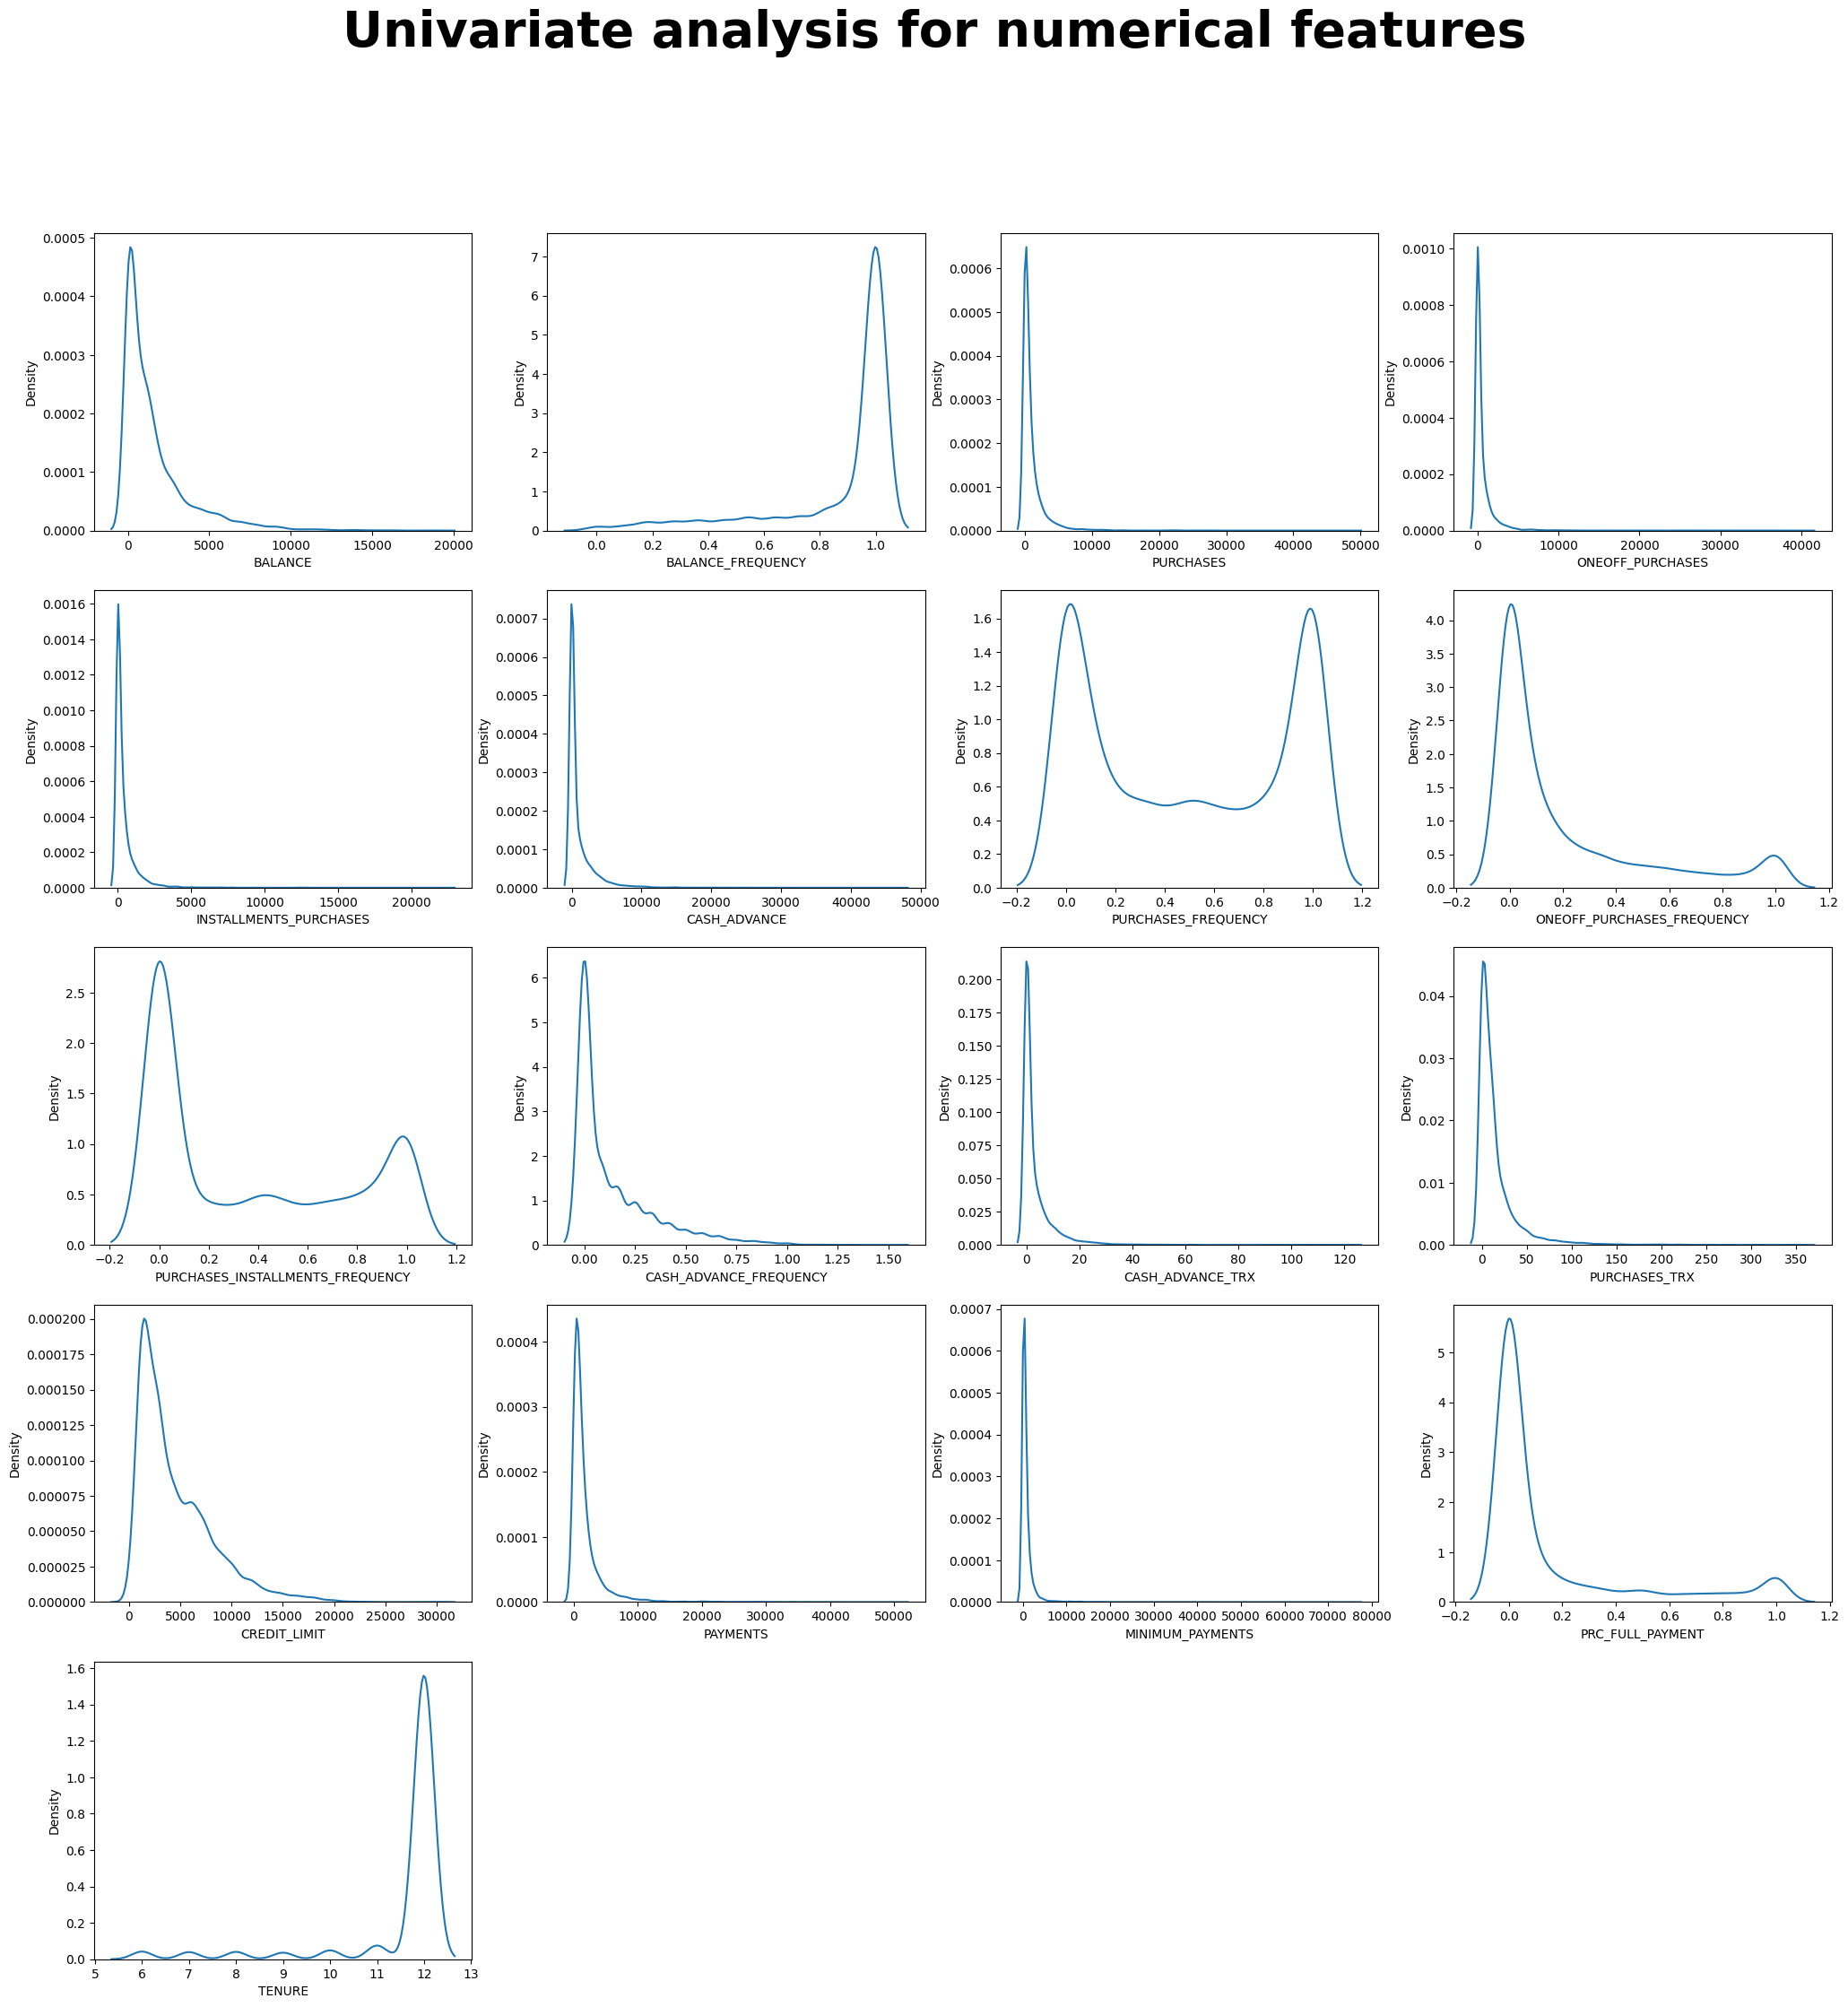

In [868]:
plt.figure(figsize=(25,25))
plt.suptitle("Univariate analysis for numerical features",fontsize=40,fontweight="bold")
for i in range(len(numerical)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(data[numerical[i]])
 
plt.savefig("./images/univariate_analysis.png")

In [869]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Text(0.5, 1.0, 'Balance Distribution')

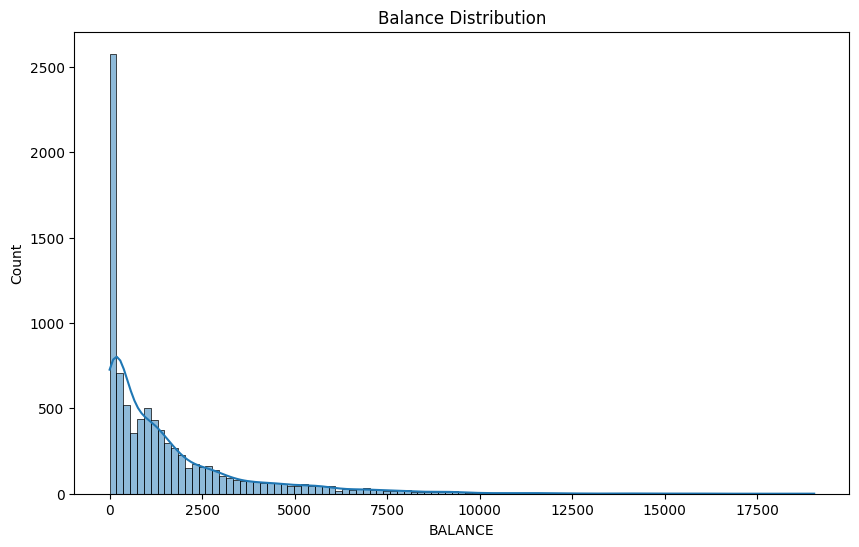

In [870]:
plt.figure(figsize=(10,6))
sns.histplot(data.BALANCE,kde=True)
plt.title("Balance Distribution")

### Report
- The credit card balance ranges from 0-20,000 us dollars 
- most of the people have zero credit (the amount they own to cc company) to miantain a good credit score

Text(0.5, 1.0, 'Balance Distribution')

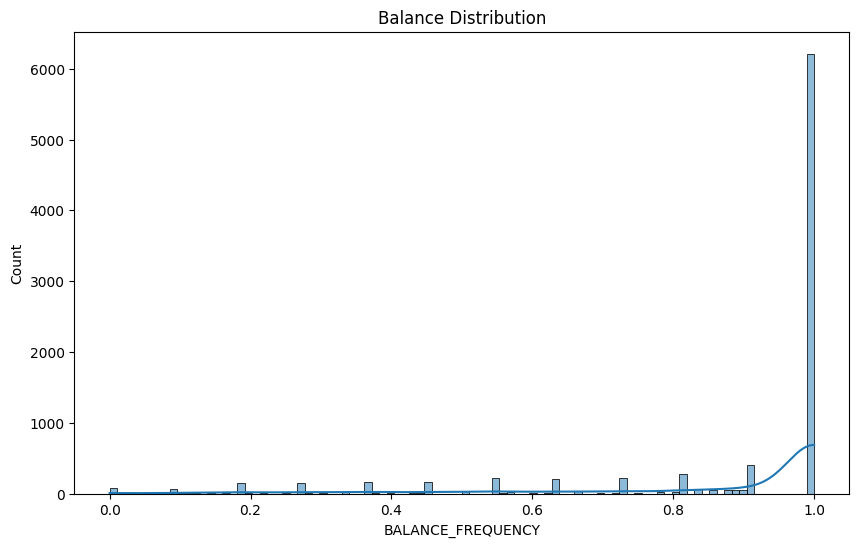

In [871]:
plt.figure(figsize=(10,6))
sns.histplot(data.BALANCE_FREQUENCY,kde=True)
plt.title("Balance Distribution")

### Report
- Most of the people repay the amount they own to the company i.e Balance to improve their credit score

(0.0, 20000.0)

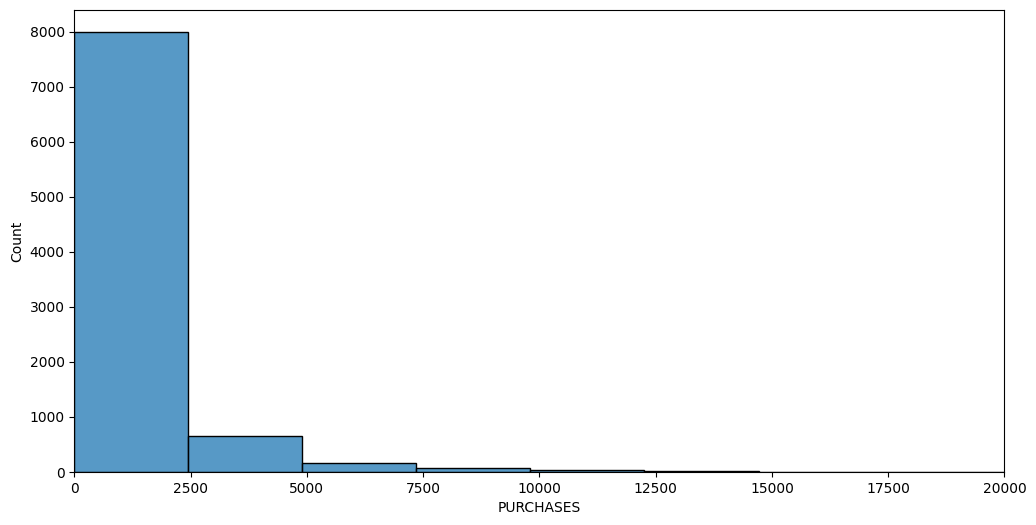

In [872]:
plt.figure(figsize=(12,6))
sns.histplot(data.PURCHASES,bins=20)
plt.xlim(0,20000)

### Report
- This chart shows that most of the people dont purchase
- most of the purchases spend from around **(0-2500)$**

<Axes: title={'center': 'Installments Purchase'}, xlabel='INSTALLMENTS_PURCHASES', ylabel='Count'>

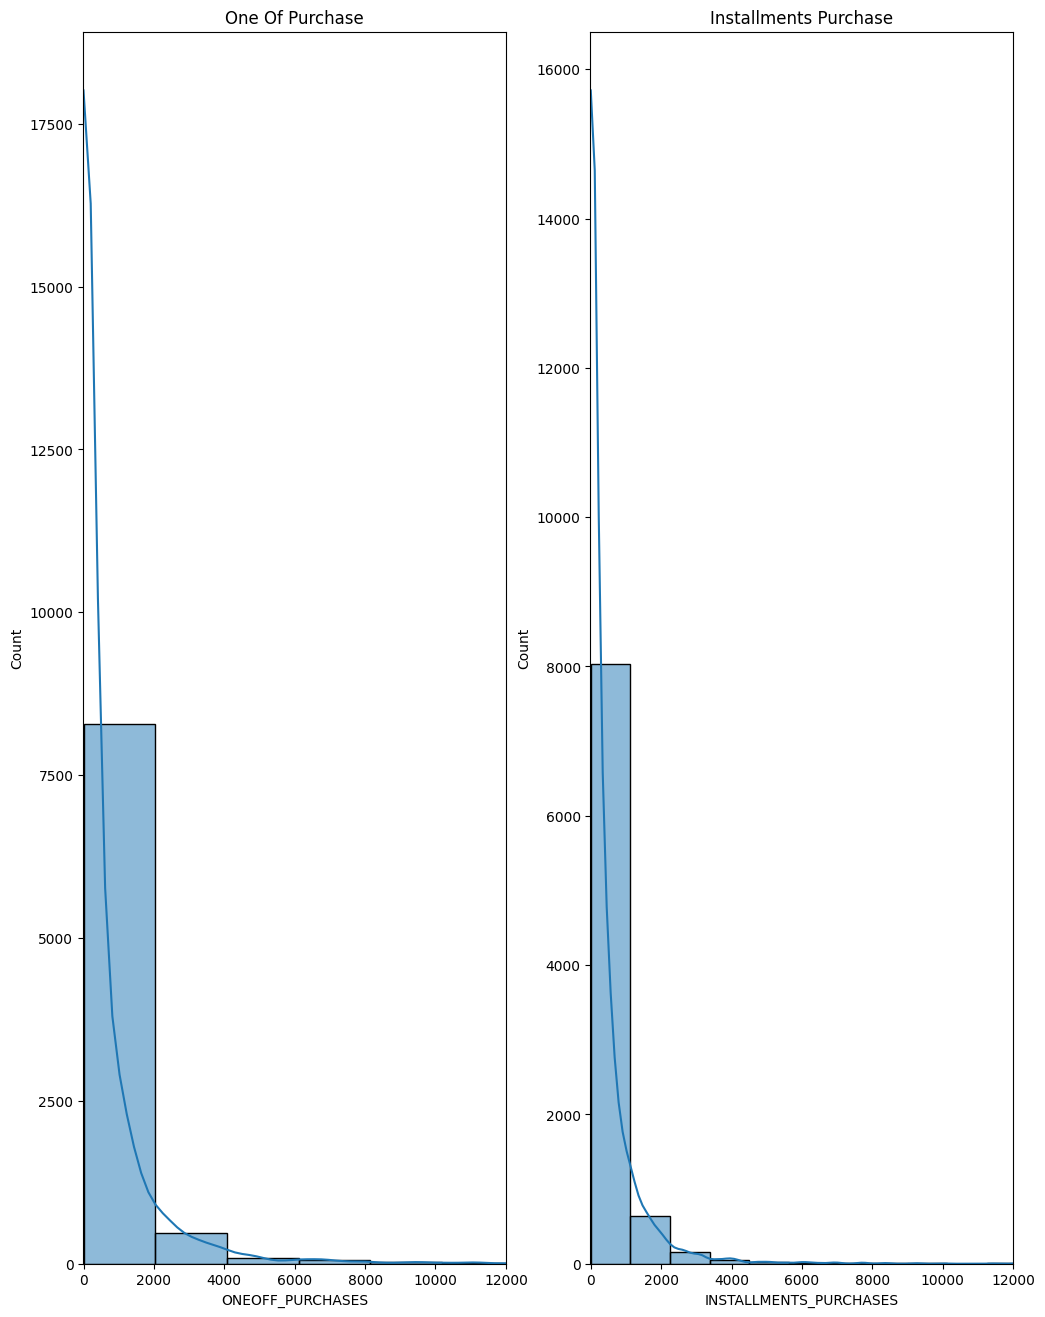

In [873]:
plt.figure(figsize=(12,16))
plt.subplot(1,2,1)
plt.title("One Of Purchase")
plt.xlim(-10,12000)
sns.histplot(data.ONEOFF_PURCHASES,kde=True,bins=20)

plt.subplot(1,2,2)
plt.title("Installments Purchase")
plt.xlim(-10,12000)
sns.histplot(data.INSTALLMENTS_PURCHASES,kde=True,bins=20)

### Report
- In both One_Off_Purchase major purchases lies in **(0-10,000)$**. 
- In Installmenst_Purchases the major purchases lies in **(0-5,000)$**.

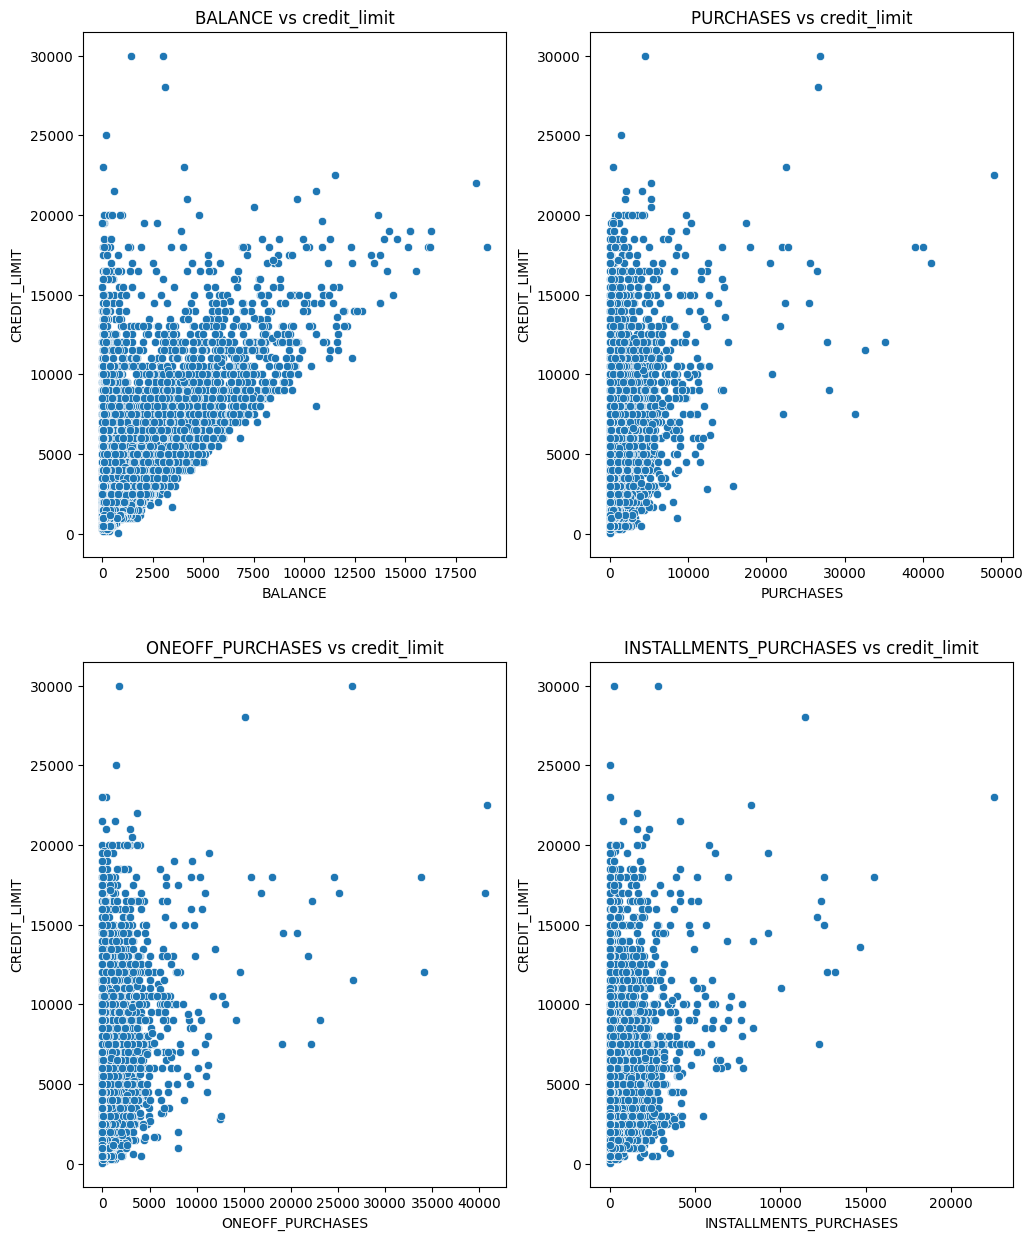

In [874]:
plt.figure(figsize=(12,15))
cols=['BALANCE','PURCHASES', 'ONEOFF_PURCHASES',"INSTALLMENTS_PURCHASES"]
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(y=data.CREDIT_LIMIT,x=data[cols[i]])
    plt.title(f"{cols[i]} vs credit_limit")

### Report
- Balance and Credit_limit has high correlation.
- As Balance increases the Credit_limit also will increase as bank will encourage people to make more payement by cc by increasing their Credit_limit..

In [875]:
numerical

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

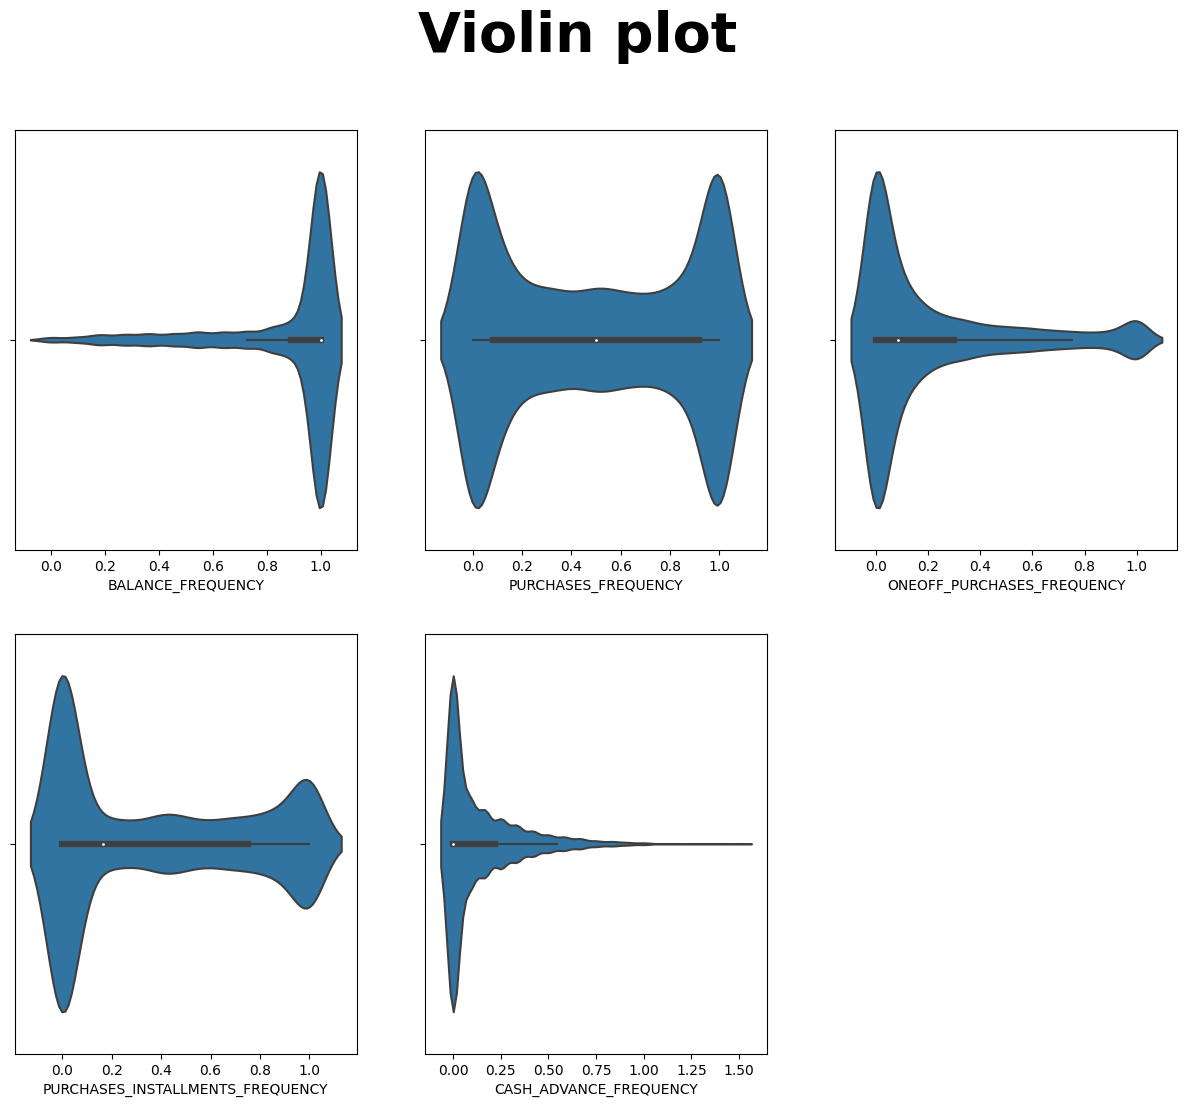

In [876]:
plt.figure(figsize=(15,12))
cols=["BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
plt.suptitle("Violin plot",fontsize=40,fontweight='bold')
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.violinplot(x=data[cols[i]])

Text(0.5, 1.0, 'Tenure choosen by customer.')

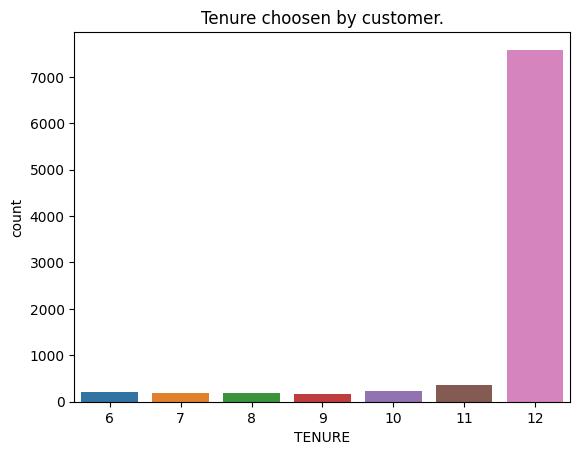

In [877]:
sns.countplot(x=data.TENURE)
plt.title("Tenure choosen by customer.")

### Report 
- Tenure is repayment period of cards, ranging from 6-12 months.
- Most of the people are selecting a tenure of 12 months , using their cc services for a year.

<Axes: xlabel='PAYMENTS', ylabel='PURCHASES'>

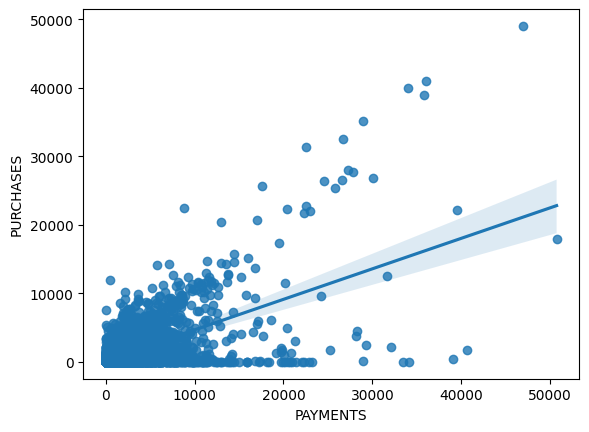

In [878]:
sns.regplot(x=data.PAYMENTS,y=data.PURCHASES)

### Report
- There is a positivie corelation  between Paymets and the Purchase variabe.

<Axes: xlabel='TENURE', ylabel='PRC_FULL_PAYMENT'>

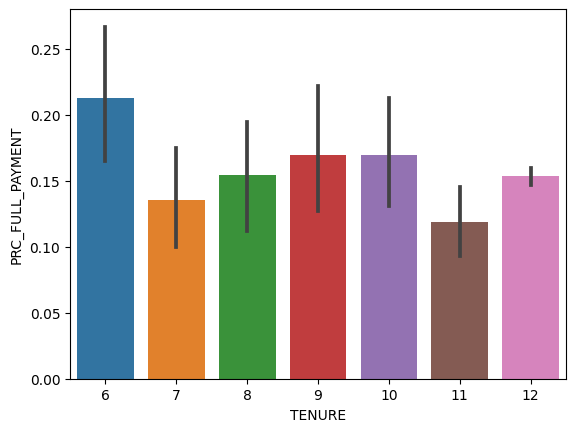

In [879]:
sns.barplot(x=data.TENURE,y=data.PRC_FULL_PAYMENT)

### Report
- The above chart represent the number of tenure of years people have choosen for their credit card cc.
- The people with tenure of 6 years have more percent of full payment made to the bank.
- As the month increases people pay less.

In [880]:
nan_features=data.columns[data.isna().sum()>=1]
nan_features

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

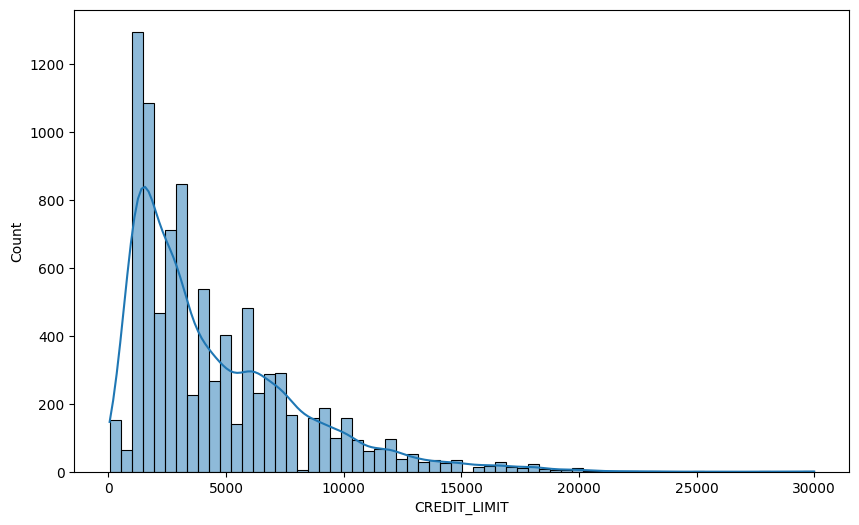

In [881]:
plt.figure(figsize=(10,6))
sns.histplot(data[nan_features[0]],kde=True)

(0.0, 20000.0)

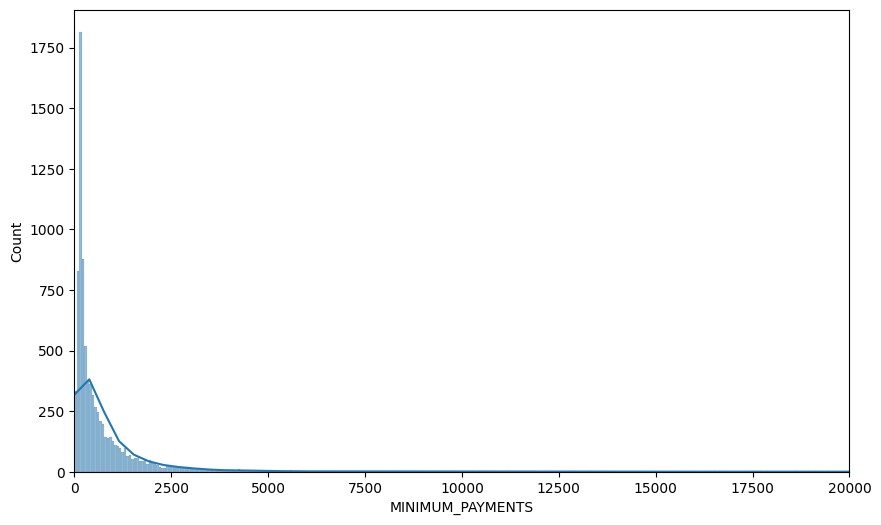

In [882]:
plt.figure(figsize=(10,6))
sns.histplot(data[nan_features[1]],kde=True)
plt.xlim(0,20000)

In [883]:
data.loc[:,nan_features].describe()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
count,8949.000000,8637.000000
mean,4494.449450,864.206542
std,3638.815725,2372.446607
min,50.000000,0.019163
25%,1600.000000,169.123707
50%,3000.000000,312.343947
75%,6500.000000,825.485459
max,30000.000000,76406.207520


In [884]:
#we replace nan values with median
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="median")
data.loc[:,nan_features]=impute.fit_transform(data.loc[:,nan_features])

In [885]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [886]:
data.duplicated().sum()

0

In [887]:
inputs=data.iloc[:,1:]
inputs.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


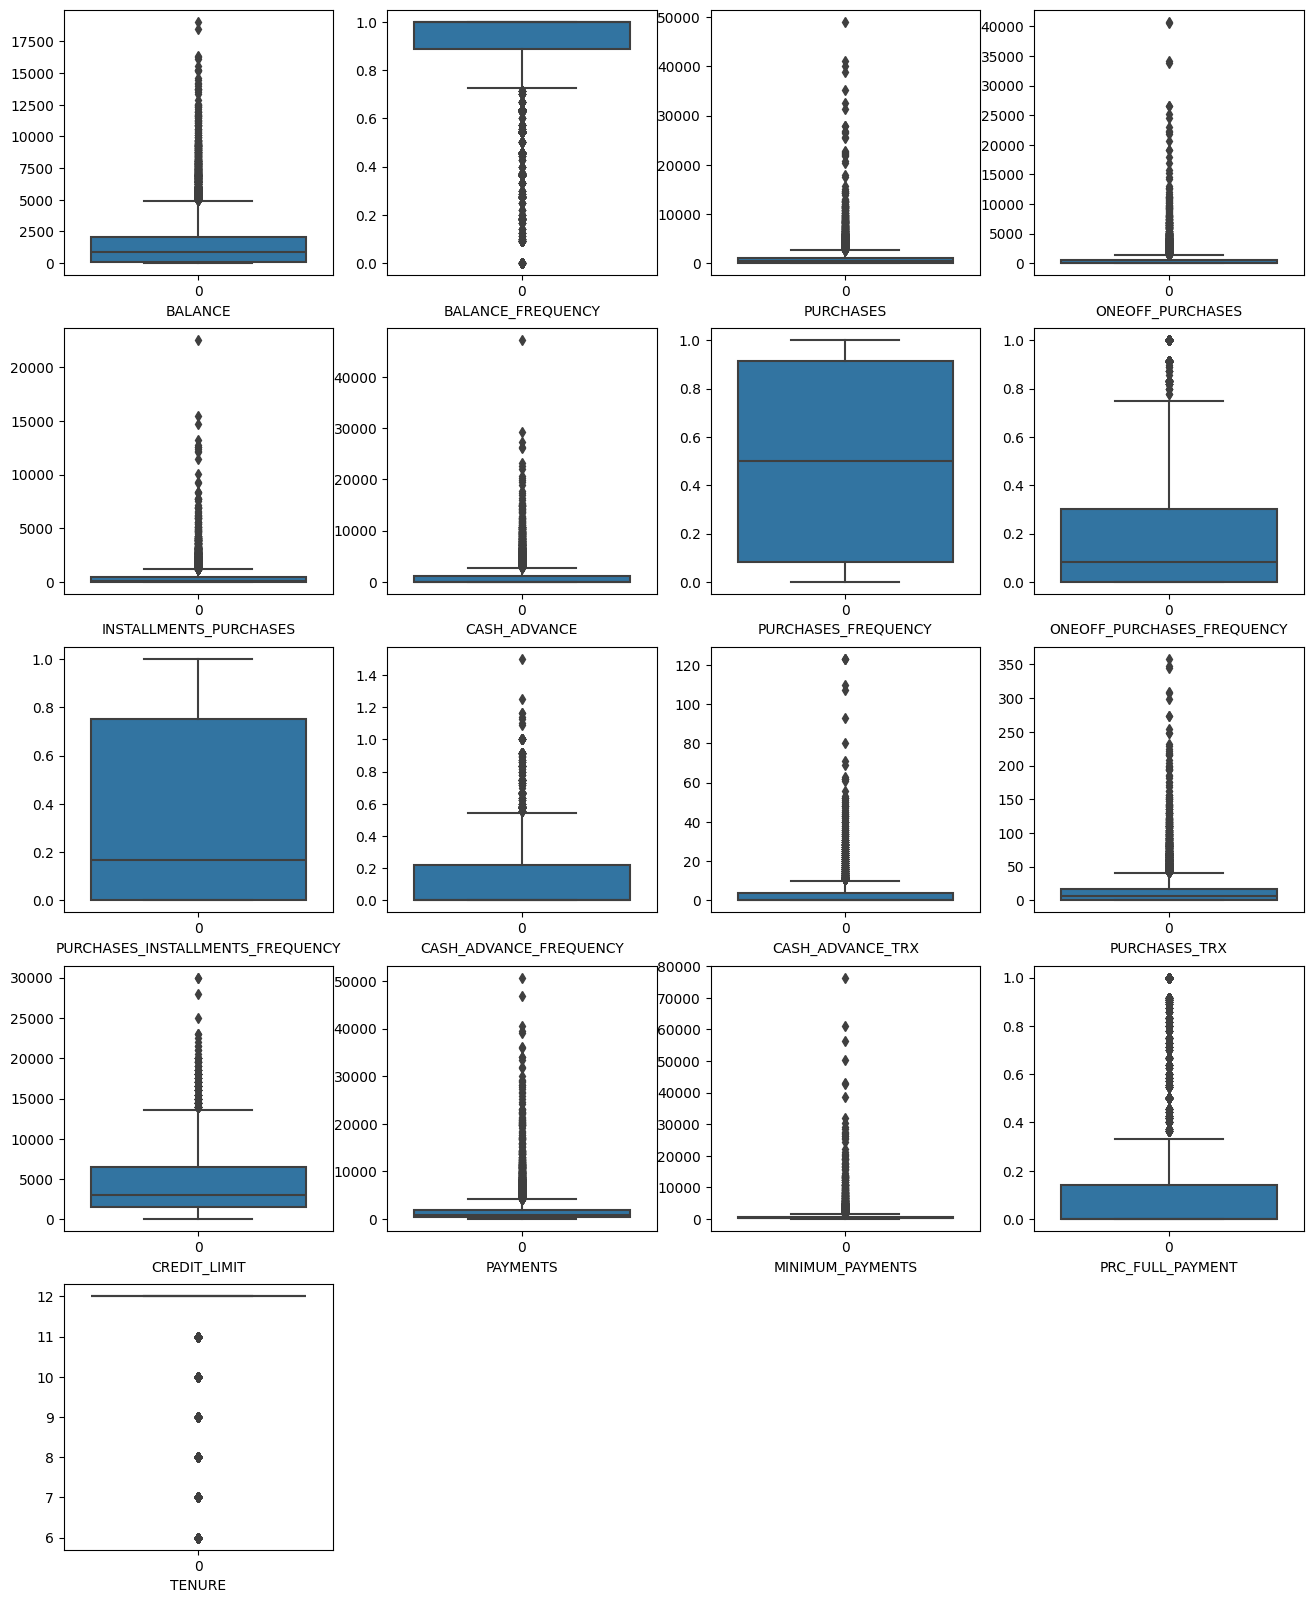

In [888]:
plt.figure(figsize=(16,20))
for i in range(inputs.shape[1]):
    plt.subplot(5,4,i+1)
    plt.xlabel(inputs.columns[i])
    sns.boxplot(inputs[inputs.columns[i]])

In [889]:
#on removing outlier can reult in removing of large amount of data so we detect them and capping them
def detect_outliers(datas,col):
    q1=datas[col].quantile(0.25)
    q2=datas[col].quantile(0.5)
    q3=datas[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    datas.loc[(datas[col]>upper_limit),col]=upper_limit
    datas.loc[(datas[col]<lower_limit),col]=lower_limit
    inputs=datas
    
    return inputs

In [890]:
for i in range(len(inputs.columns)):
    detect_outliers(inputs,inputs.columns[i])

In [891]:
inputs.shape

(8950, 17)

After Outlier Treatment

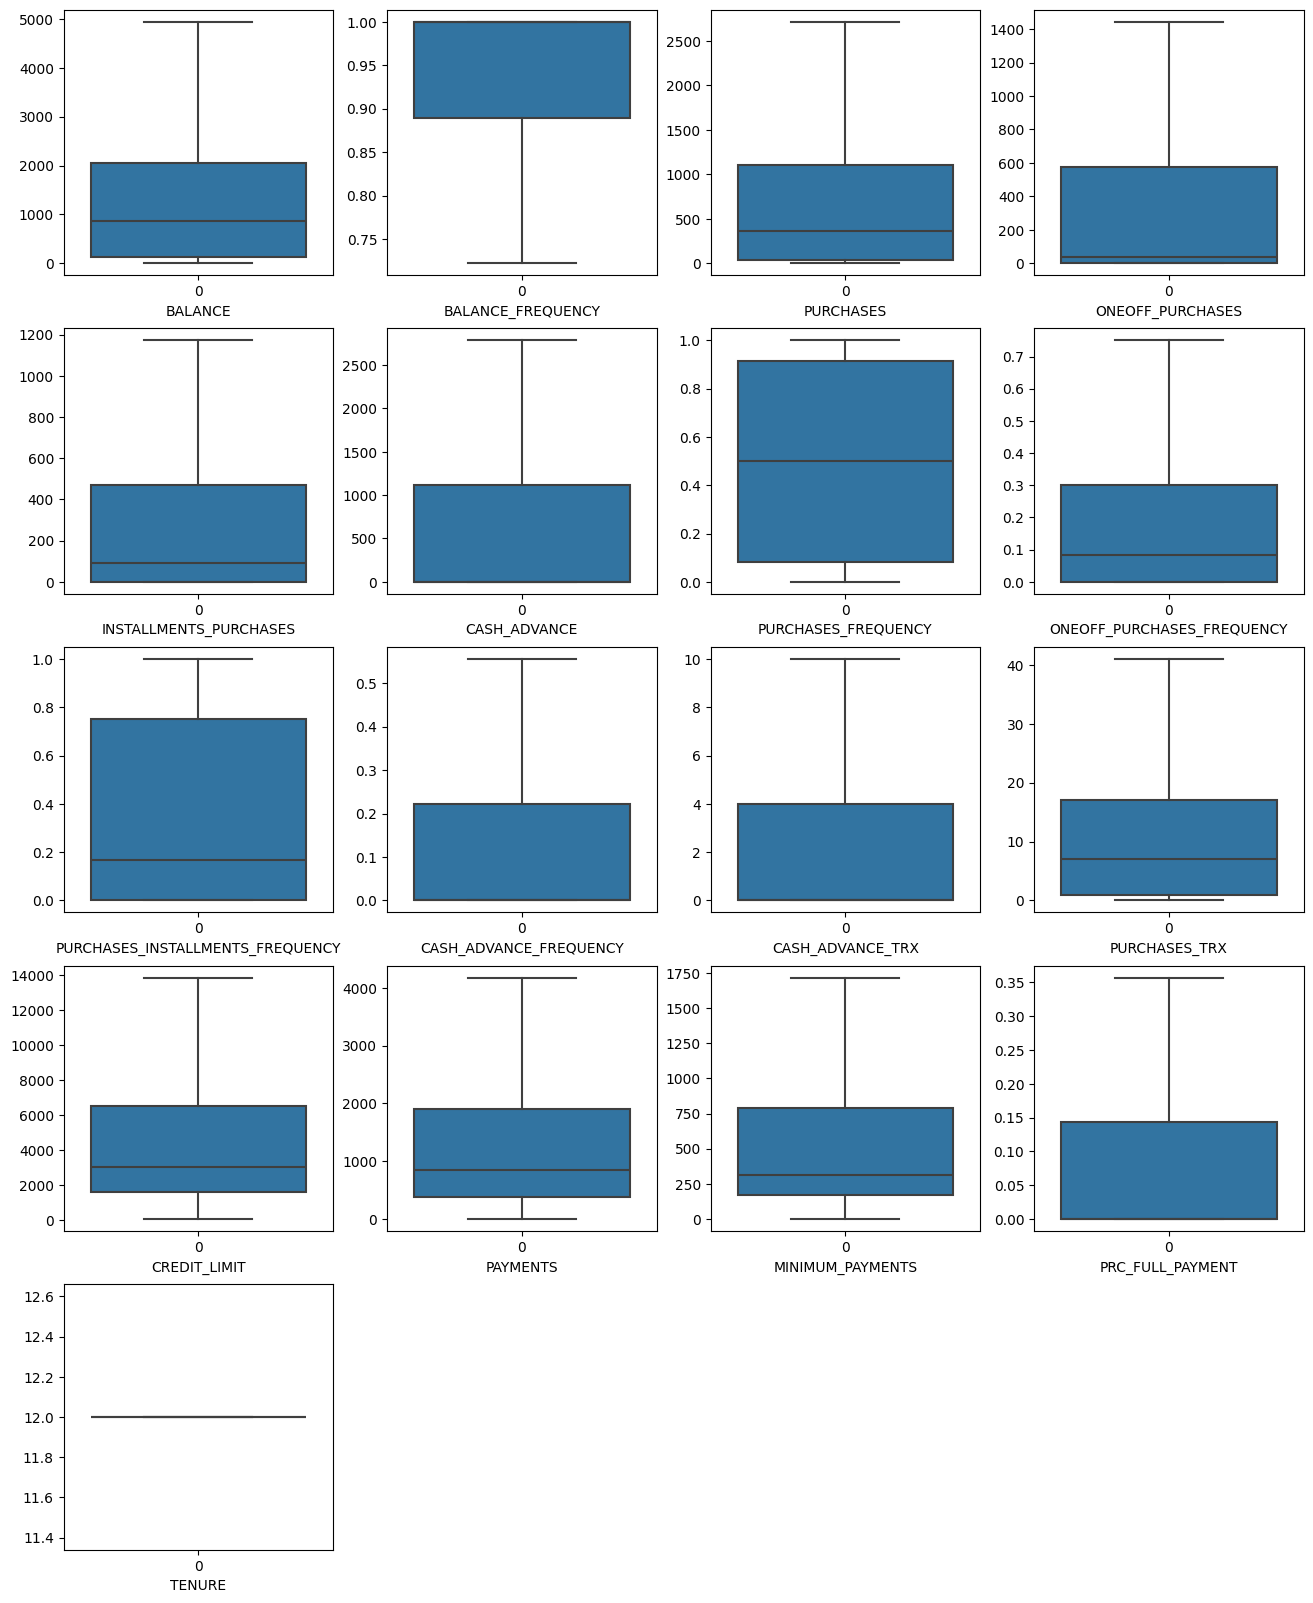

In [892]:
plt.figure(figsize=(16,20))
for i in range(inputs.shape[1]):
    plt.subplot(5,4,i+1)
    plt.xlabel(inputs.columns[i])
    sns.boxplot(inputs[inputs.columns[i]])

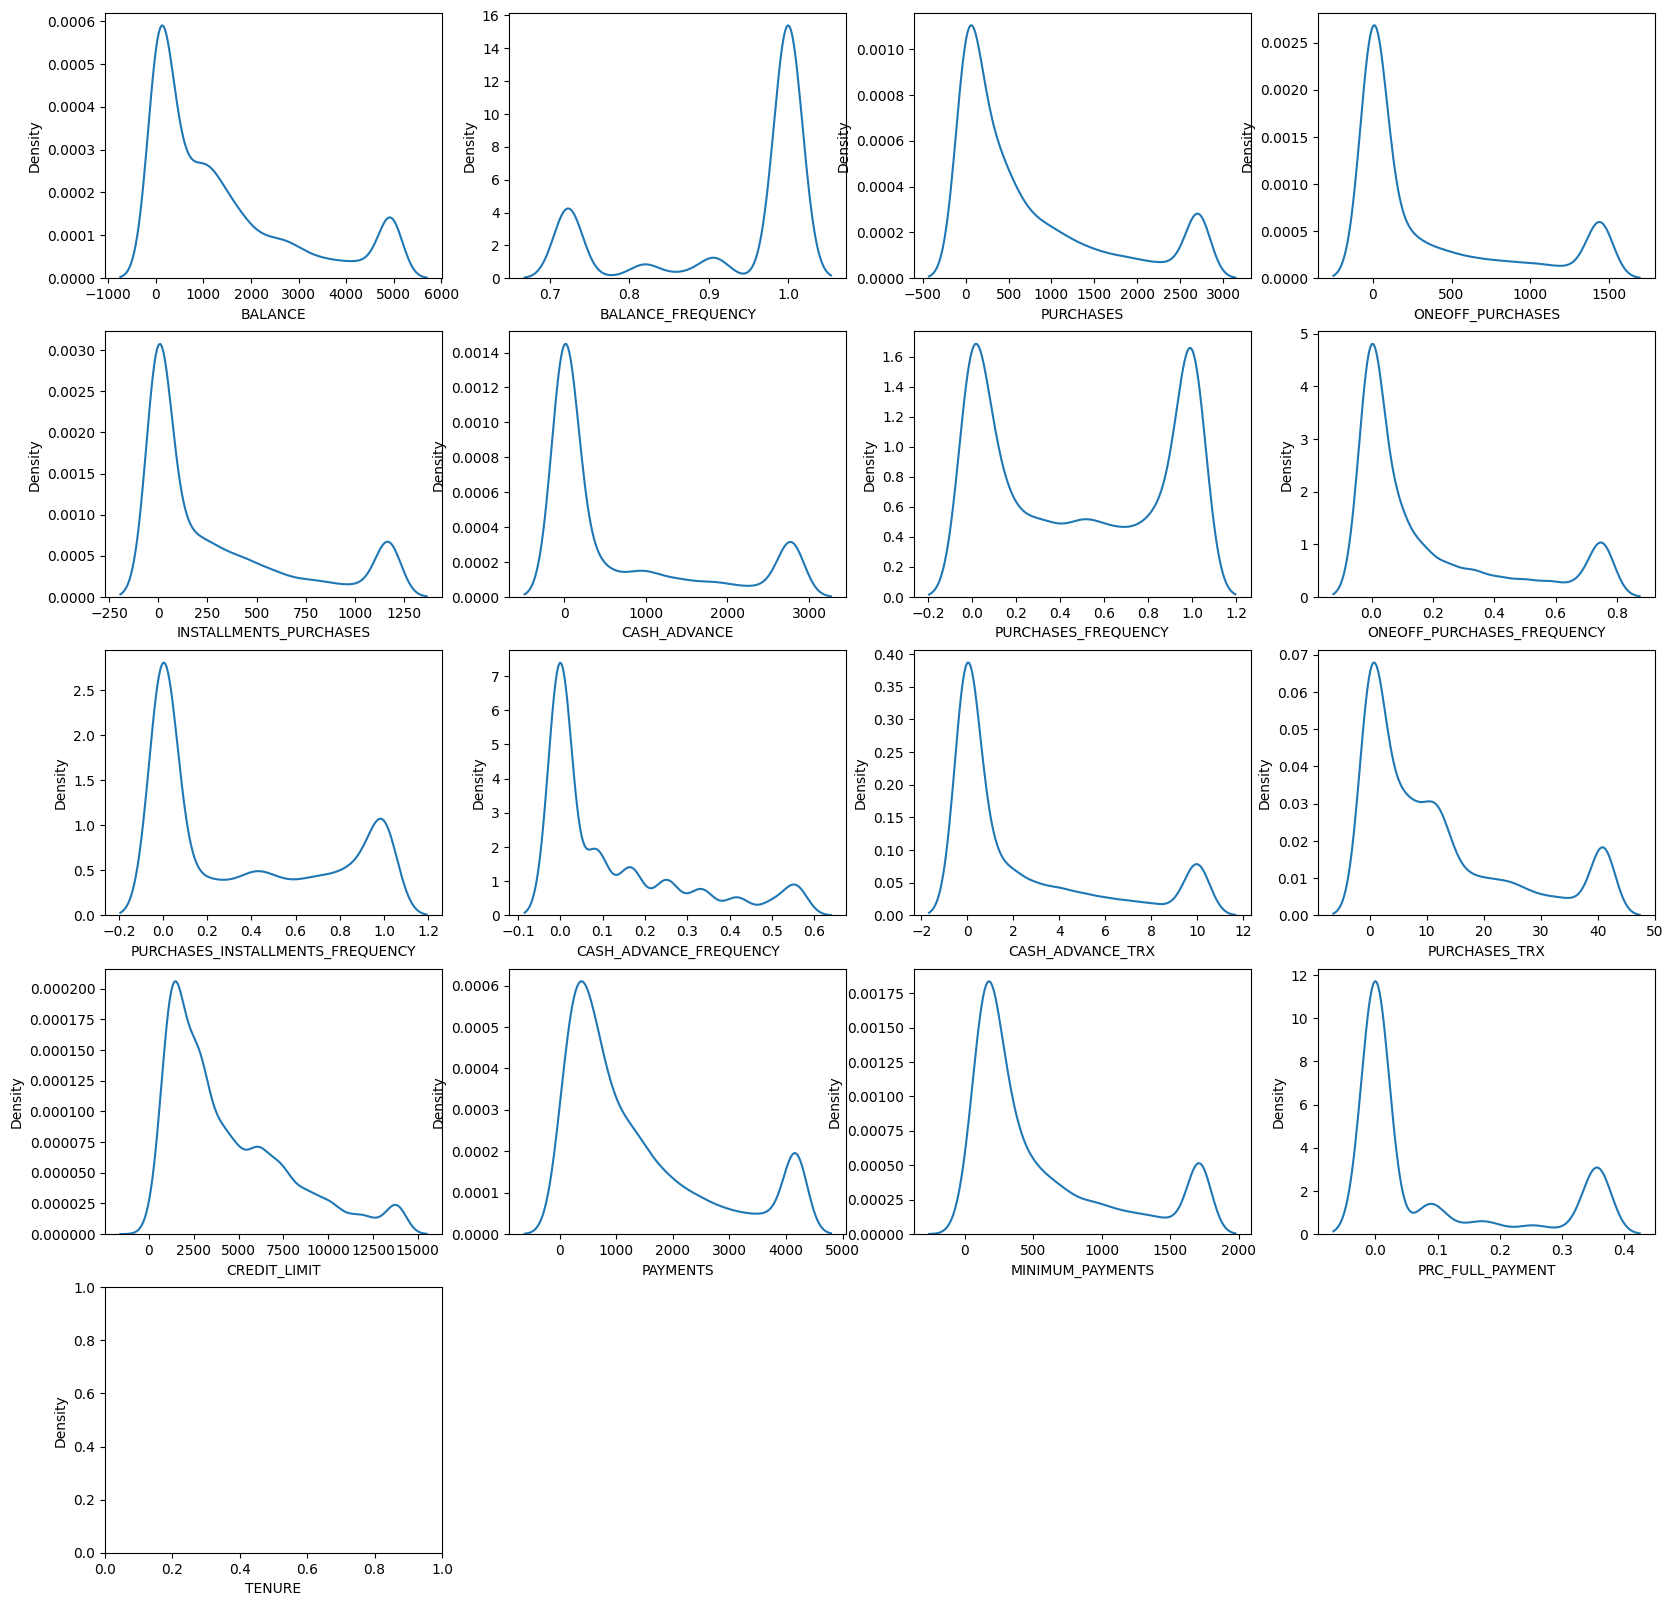

In [893]:
plt.figure(figsize=(20,20))
for i in range(inputs.shape[1]):
    plt.subplot(5,4,i+1)
    plt.xlabel(inputs.columns[i])
    sns.kdeplot(inputs[inputs.columns[i]])

# PowerTransformer 
- Apply a power transform featurewise to make data more Gaussian-like.
- This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.
- The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.
- **By default, zero-mean, unit-variance normalization is applied to the transformed data.**

In [894]:
cols=[i for i in range(len(inputs.columns))]
cols

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [895]:
num=[features for features in inputs.columns if inputs[features].dtype!="O"][1:]
num

['BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

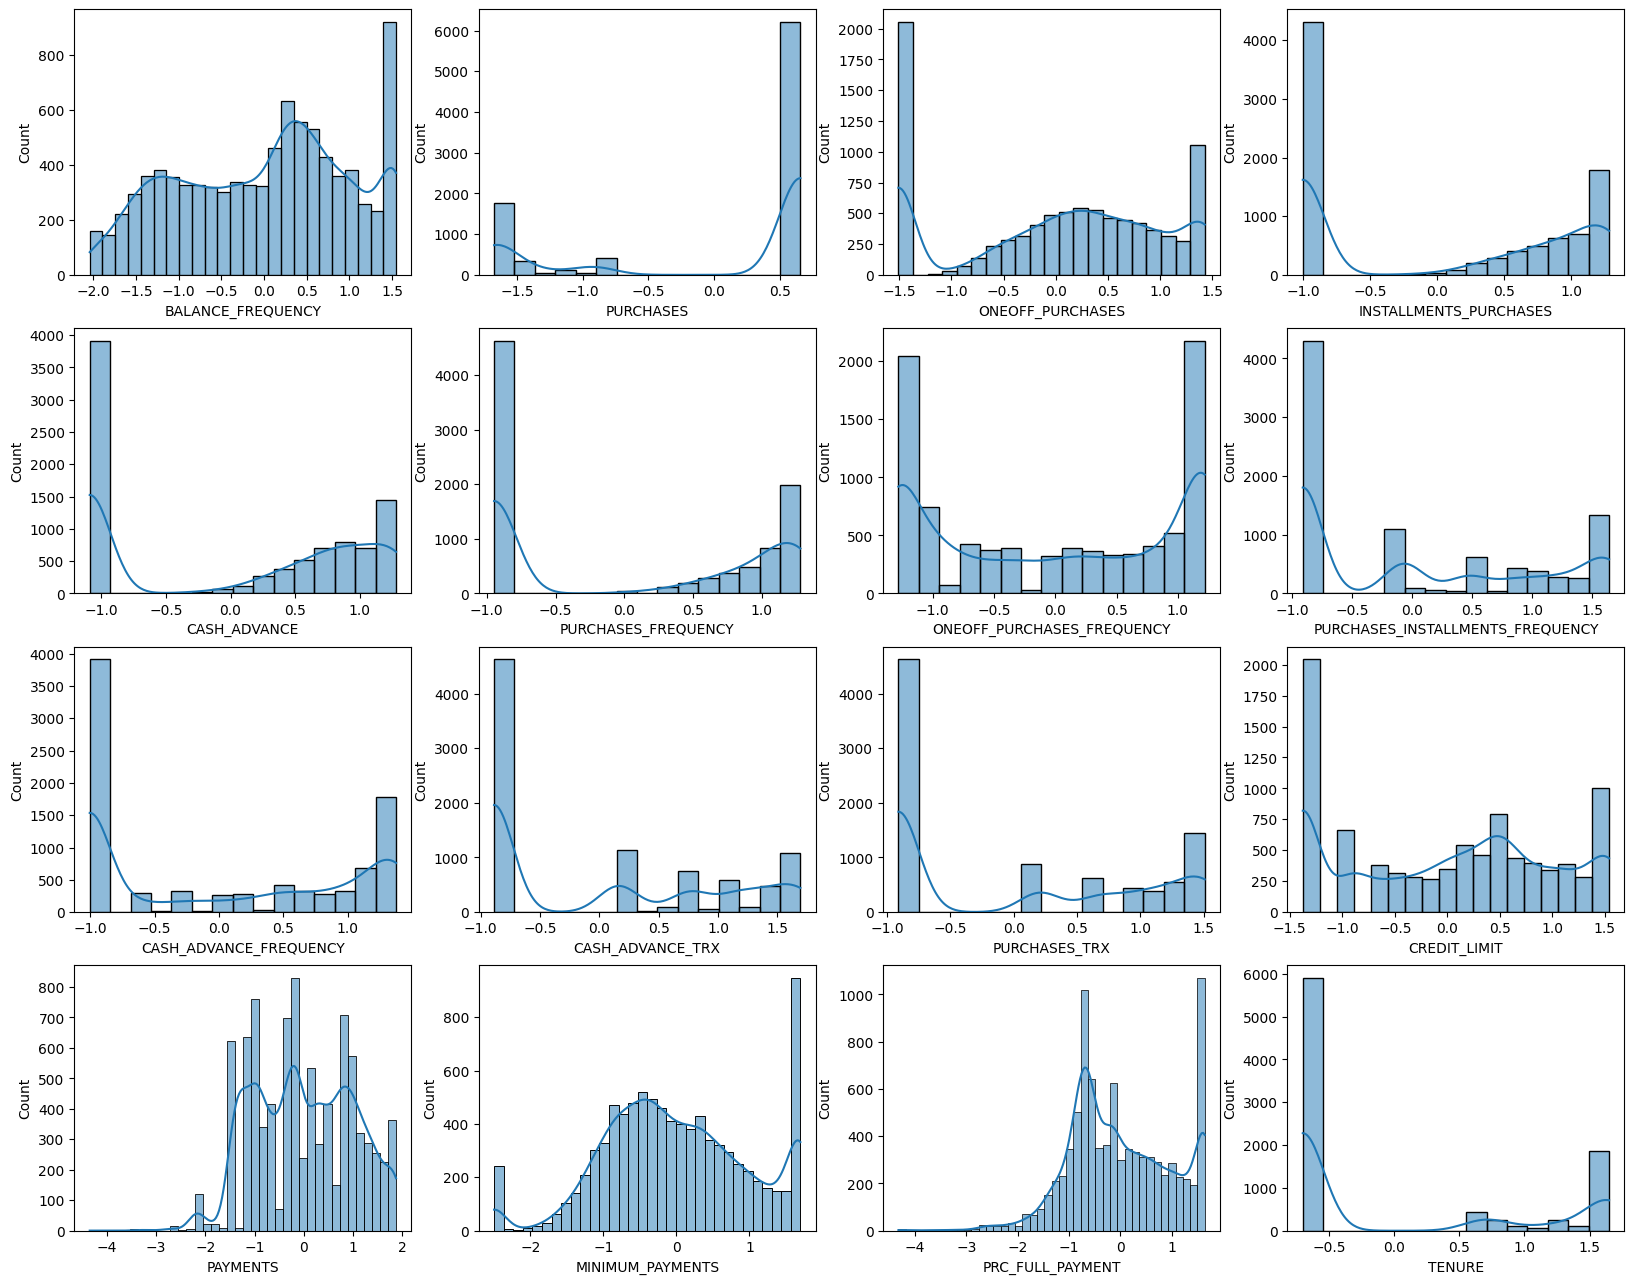

In [896]:
from sklearn.preprocessing import PowerTransformer
datas=inputs
pt=PowerTransformer()
df=inputs.copy()
df=pt.fit_transform(df)
plt.figure(figsize=(20,20))
for i in range(len(num)):
    plt.subplot(5,4,i+1)
    plt.xlabel(num[i])
    sns.histplot(x=df[:,i],kde=True)

In [897]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ("PowerTransformer",PowerTransformer(),cols),
    ],
    remainder="passthrough",
)


In [898]:
inputs=ct.fit_transform(inputs)
inputs[0],inputs.dtype

(array([-1.26021696, -1.46832939, -0.42596618, -1.00514424,  0.38593288,
        -0.94705549, -0.76685887, -0.91082677, -0.6066425 , -0.88813179,
        -0.91124927, -0.62407153, -1.42383106, -1.08823768, -0.89490796,
        -0.69990063,  0.        ]),
 dtype('float64'))

In [899]:
from sklearn.decomposition import PCA
pca=PCA(n_components="mle",svd_solver="full")
inputs=pca.fit_transform(inputs)
inputs.shape

(8950, 16)

In [900]:
from sklearn.cluster import KMeans

In [901]:
wcss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i)
    kmean.fit(inputs)
    wcss.append(kmean.inertia_)
    print(f"{i} clusters | Within_in_cluster_sum_of_square : {kmean.inertia_}")

1 clusters | Within_in_cluster_sum_of_square : 143200.0000000003
2 clusters | Within_in_cluster_sum_of_square : 101388.65876635196
3 clusters | Within_in_cluster_sum_of_square : 82443.03178538884
4 clusters | Within_in_cluster_sum_of_square : 72229.92916969475
5 clusters | Within_in_cluster_sum_of_square : 63628.15425481419
6 clusters | Within_in_cluster_sum_of_square : 59472.59136531592
7 clusters | Within_in_cluster_sum_of_square : 55737.04610141709
8 clusters | Within_in_cluster_sum_of_square : 54699.32574754294
9 clusters | Within_in_cluster_sum_of_square : 50264.62415138171


Text(0, 0.5, 'WCC_list')

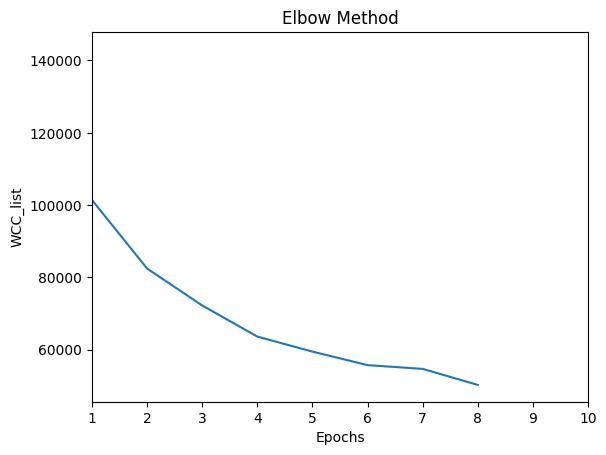

In [911]:
plt.plot(wcss)
plt.xlim(1,10)
plt.title("Elbow Method")
plt.xlabel("Epochs")
plt.ylabel("WCC_list")

In [903]:
from sklearn.metrics import silhouette_score
sillhouete_scoreses=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(inputs)
    y_pred=kmean.predict(inputs)
    sillhouete_scores=silhouette_score(inputs,y_pred)
    sillhouete_coefficient=np.mean(sillhouete_scores)
    sillhouete_scoreses.append(sillhouete_coefficient)
    print("k = {} | silhouette score = {}".format(i, sillhouete_coefficient))

k = 2 | silhouette score = 0.2751578549231618
k = 3 | silhouette score = 0.25566709714283176
k = 4 | silhouette score = 0.2617920708329251
k = 5 | silhouette score = 0.2657289619300485
k = 6 | silhouette score = 0.21979667699206748
k = 7 | silhouette score = 0.22259798845920267
k = 8 | silhouette score = 0.20788076088439345
k = 9 | silhouette score = 0.20787714068445298
k = 10 | silhouette score = 0.20863646126577012


Text(0, 0.5, 'silhouette coefficient')

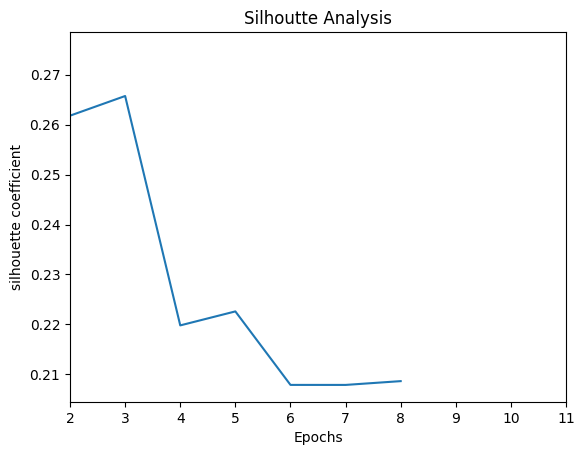

In [904]:
plt.plot(sillhouete_scoreses)
plt.title("Silhoutte Analysis")
plt.xlim(2,11)
plt.xlabel("Epochs")
plt.ylabel("silhouette coefficient")

In [912]:
min(sillhouete_scoreses),max(sillhouete_scoreses)

(0.20787714068445298, 0.2751578549231618)

#### Final model of Kmeans clustering
- From Elbow and Silhoutte method we can conclude we get 5 different cluster

In [913]:
k_mns=KMeans(n_clusters=5)
k_mns.fit(inputs)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [914]:
cluster_centroids=k_mns.predict(inputs)

In [915]:
cluster_centroids,max(cluster_centroids),min(cluster_centroids)

(array([1, 2, 0, ..., 1, 2, 0]), 4, 0)

In [916]:
k_mns.inertia_

63628.111444590344

In [917]:
k_mns.cluster_centers_.shape

(5, 16)

In [919]:
# k_mns.cluster_centers_